# 1. Linear Regression Models

## Simple Linear Regression

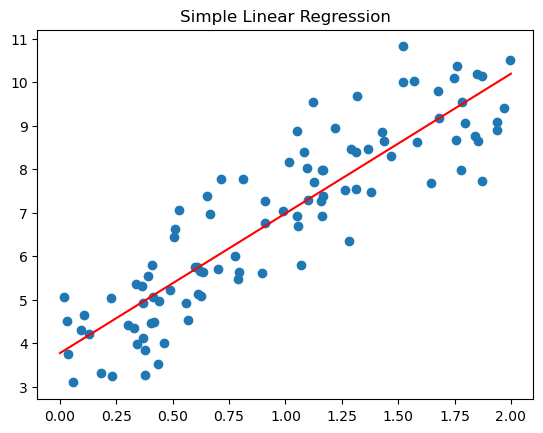

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predictions
X_new = np.array([[0], [2]])
y_predict = model.predict(X_new)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.title("Simple Linear Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Multiple Linear Regression

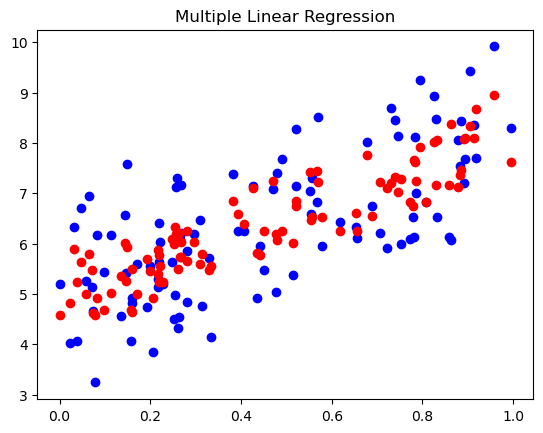

In [2]:
from sklearn.linear_model import LinearRegression

# Generate synthetic data
X = np.random.rand(100, 3)
y = 4 + 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_predict = model.predict(X)

# Plotting (only first two features for visualization)
plt.scatter(X[:, 0], y, color='blue')
plt.scatter(X[:, 0], y_predict, color='red')
plt.title("Multiple Linear Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Polynomial Regression

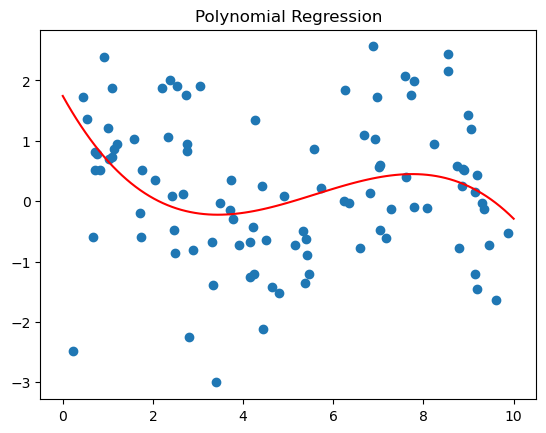

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate synthetic data
X = np.random.rand(100, 1) * 10
y = np.sin(X) + np.random.randn(100, 1)

# Fit the model
degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

# Predictions
X_new = np.linspace(0, 10, 100).reshape(-1, 1)
y_predict = model.predict(X_new)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.title("Polynomial Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Ridge Regression (L2 Regularization)

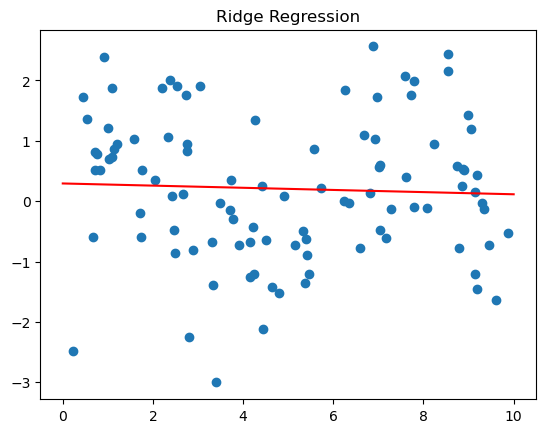

In [4]:
from sklearn.linear_model import Ridge

# Fit the model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)

# Predictions
y_predict = ridge_model.predict(X_new)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.title("Ridge Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Lasso Regression (L1 Regularization)

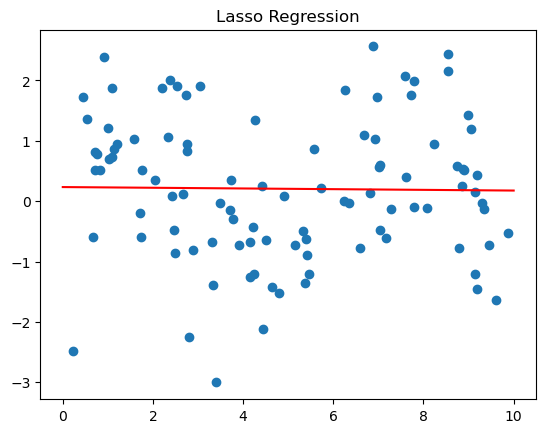

In [5]:
from sklearn.linear_model import Lasso

# Fit the model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X, y)

# Predictions
y_predict = lasso_model.predict(X_new)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.title("Lasso Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Elastic Net Regression (L1 + L2 Regularization)

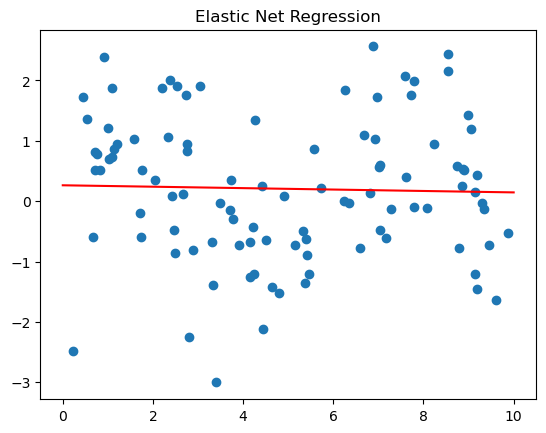

In [6]:
from sklearn.linear_model import ElasticNet

# Fit the model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_model.fit(X, y)

# Predictions
y_predict = elastic_net_model.predict(X_new)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.title("Elastic Net Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

# 2. Generalized Linear Models (GLMs)

## Logistic Regression

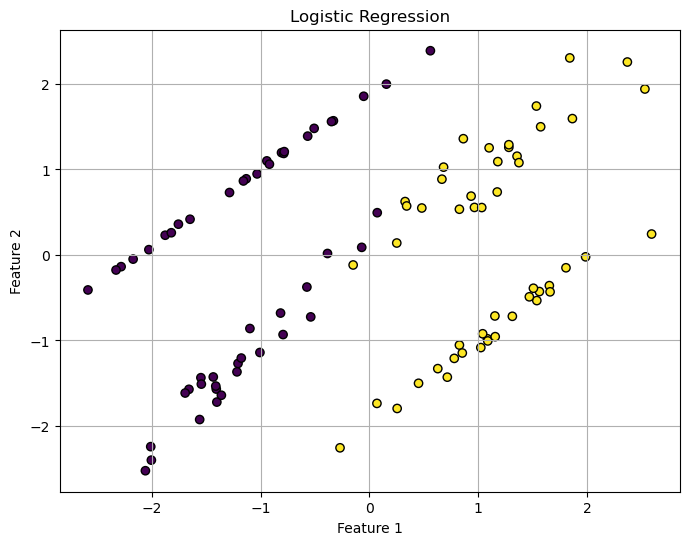

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate synthetic data with explicit feature types
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# Fit the model
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

# Predictions
y_predict = logistic_model.predict(X)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()


## Poisson Regression

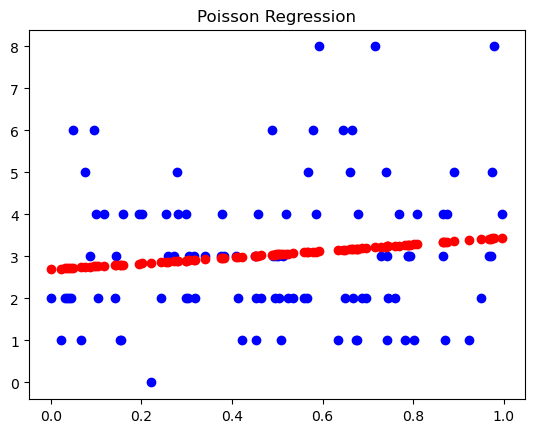

In [8]:
import statsmodels.api as sm

# Generate synthetic data
X = np.random.rand(100, 1)
y = np.random.poisson(lam=np.exp(1 + 0.5 * X)).flatten()

# Fit the model
poisson_model = sm.GLM(y, sm.add_constant(X), family=sm.families.Poisson()).fit()

# Predictions
y_predict = poisson_model.predict(sm.add_constant(X))

# Plotting
plt.scatter(X, y, color='blue')
plt.scatter(X, y_predict, color='red')
plt.title("Poisson Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Gamma Regression

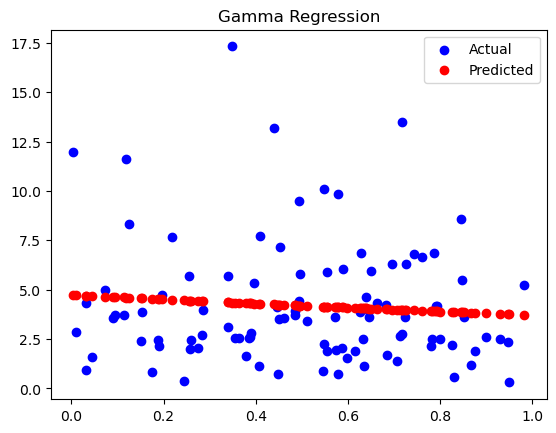

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Data
X = np.random.rand(100, 1)
y = np.random.gamma(2, 2, 100)

# Model
X_ = sm.add_constant(X)
model = sm.GLM(y, X_, family=sm.families.Gamma(link=sm.families.links.Log())).fit()
y_pred = model.predict(X_)

# Plot
plt.scatter(X, y, label='Actual', color='blue')
plt.scatter(X, y_pred, label='Predicted', color='red')
plt.title("Gamma Regression")
plt.legend()
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Negative Binomial Regression

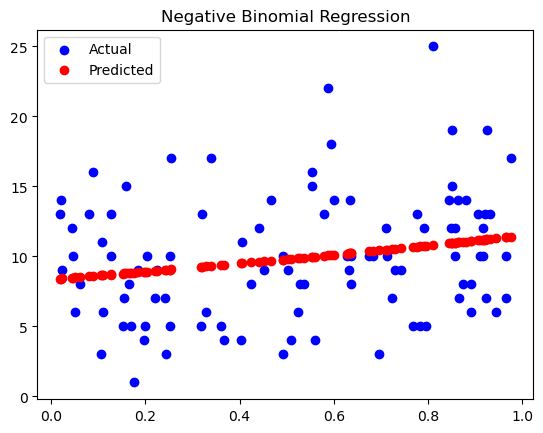

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Data
X = np.random.rand(100, 1)
y = np.random.negative_binomial(n=10, p=0.5, size=100)

# Model with alpha set
X_ = sm.add_constant(X)
model = sm.GLM(y, X_, family=sm.families.NegativeBinomial(alpha=1.0)).fit()
y_pred = model.predict(X_)

# Plot
plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(X, y_pred, color='red', label='Predicted')
plt.title("Negative Binomial Regression")
plt.legend()
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Probit Regression

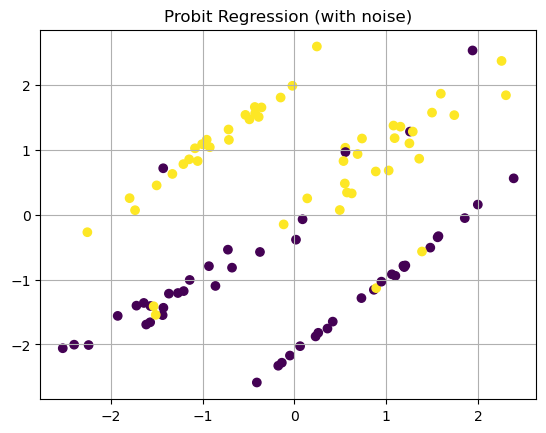

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.datasets import make_classification

# Less "perfect" data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, flip_y=0.1, random_state=42)

# Probit regression
X_ = sm.add_constant(X)
model = sm.GLM(y, X_, family=sm.families.Binomial(link=sm.families.links.Probit())).fit()
y_pred = model.predict(X_)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', label='True Labels')
plt.title("Probit Regression (with noise)")
plt.grid(True)
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

# 3. Tree-Based Regression Models

## Decision Tree Regression

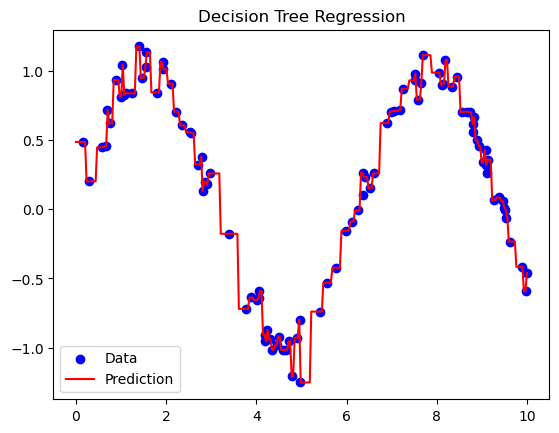

In [12]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# Generate 1D data
X = np.sort(np.random.rand(100, 1) * 10, axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, size=X.shape[0])

# Fit the model
tree_model = DecisionTreeRegressor()
tree_model.fit(X, y)

# Predictions on a smooth curve
X_new = np.linspace(0, 10, 300).reshape(-1, 1)
y_predict = tree_model.predict(X_new)

# Plotting
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X_new, y_predict, "r-", label="Prediction")
plt.title("Decision Tree Regression")
plt.legend()
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Random Forest Regression

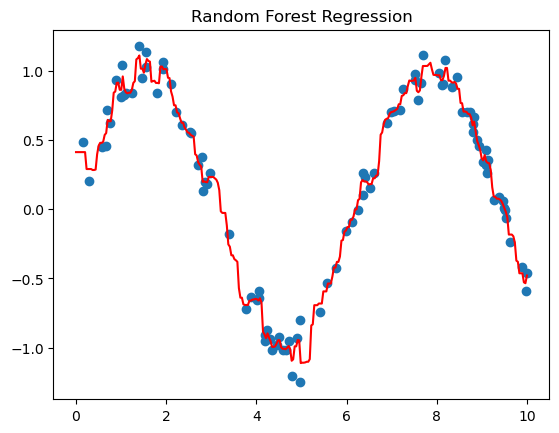

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Fit the model
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Predictions
y_predict = rf_model.predict(X_new)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.title("Random Forest Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Gradient Boosting Regression

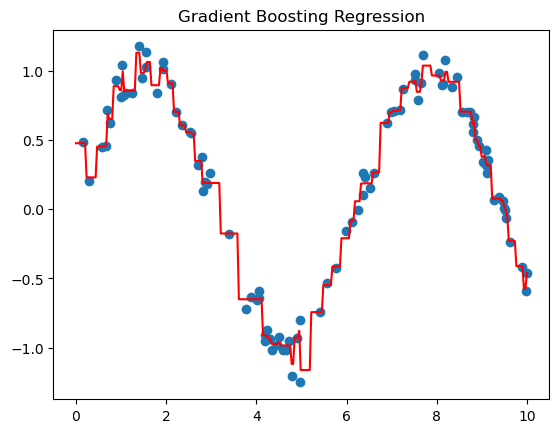

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

# Fit the model
gb_model = GradientBoostingRegressor()
gb_model.fit(X, y)

# Predictions
y_predict = gb_model.predict(X_new)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.title("Gradient Boosting Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## XGBoost Regression

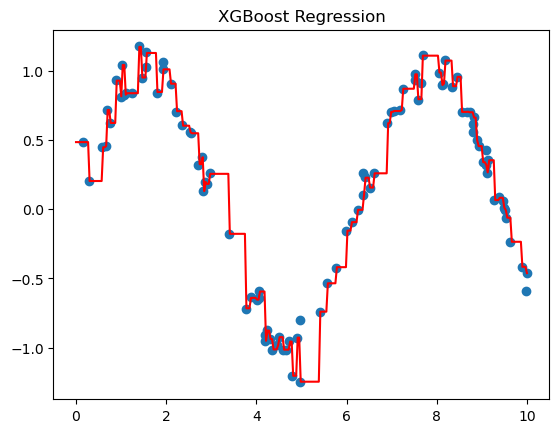

In [15]:
import xgboost as xgb

# Fit the model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X, y)

# Predictions
y_predict = xgb_model.predict(X_new)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.title("XGBoost Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## LightGBM Regression

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 1
[LightGBM] [Info] Start training from score 0.211693


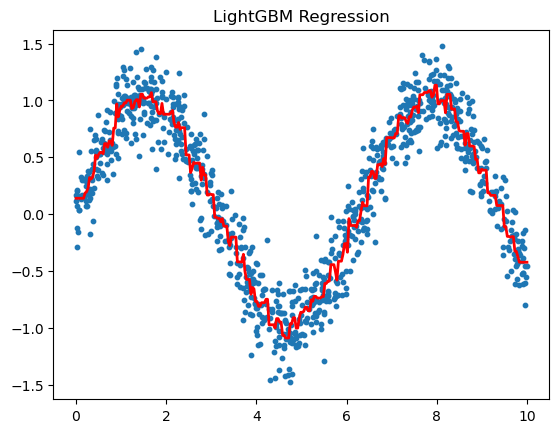

In [43]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb

# Suppress specific warnings
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Set a default logical core count
warnings.filterwarnings("ignore", message="Could not find the number of physical cores")

# More complex synthetic data
X = np.sort(np.random.rand(1000, 1) * 10, axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, size=X.shape[0])

# Train model
model = lgb.LGBMRegressor()
model.fit(X, y)

# Predict
X_new = np.linspace(0, 10, 300).reshape(-1, 1)
y_pred = model.predict(X_new)

# Plot
plt.scatter(X, y, s=10)
plt.plot(X_new, y_pred, "r-", linewidth=2)
plt.title("LightGBM Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## CatBoost Regression

In [17]:
!pip install catboost

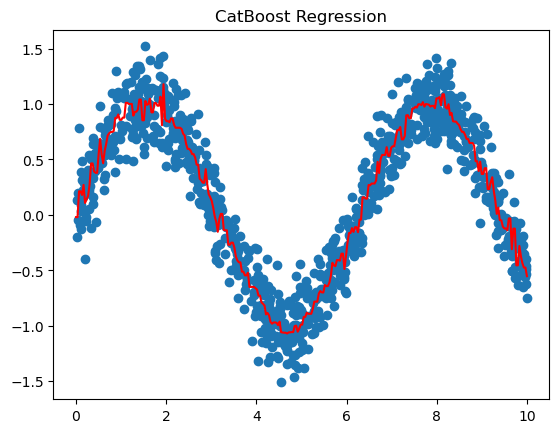

In [18]:
from catboost import CatBoostRegressor

# Fit the model
cat_model = CatBoostRegressor(silent=True)
cat_model.fit(X, y)

# Predictions
y_predict = cat_model.predict(X_new)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.title("CatBoost Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

# 4. Support Vector Regression (SVR)

## Linear SVR

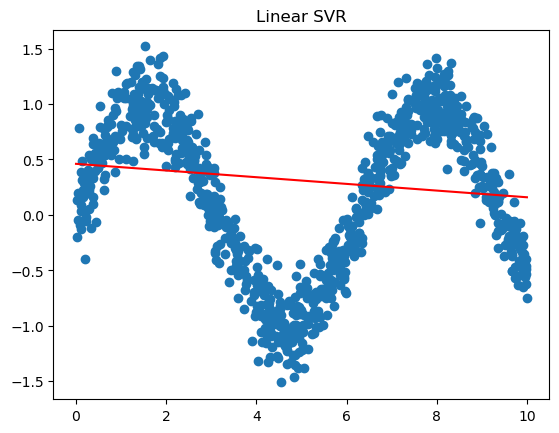

In [19]:
from sklearn.svm import SVR

# Fit the model
svr_model = SVR(kernel='linear')
svr_model.fit(X, y.flatten())

# Predictions
y_predict = svr_model.predict(X_new)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.title("Linear SVR")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Kernel SVR (e.g., RBF)

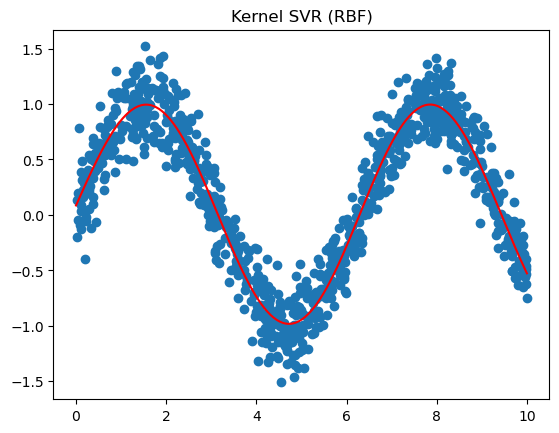

In [20]:
# Fit the model
svr_rbf_model = SVR(kernel='rbf')
svr_rbf_model.fit(X, y.flatten())

# Predictions
y_predict = svr_rbf_model.predict(X_new)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.title("Kernel SVR (RBF)")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

# 5. Instance-Based Regression

## K-Nearest Neighbors Regression (KNN Regression)

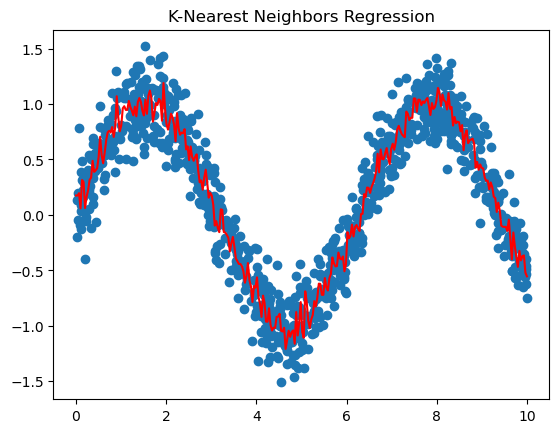

In [21]:
from sklearn.neighbors import KNeighborsRegressor

# Fit the model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X, y)

# Predictions
y_predict = knn_model.predict(X_new)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.title("K-Nearest Neighbors Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Locally Weighted Regression (LWR)

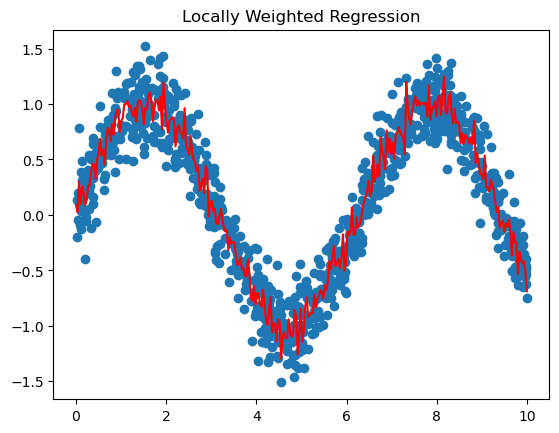

In [22]:
from sklearn.neighbors import KNeighborsRegressor

# Fit the model
lwr_model = KNeighborsRegressor(n_neighbors=10, weights='distance')
lwr_model.fit(X, y)

# Predictions
y_predict = lwr_model.predict(X_new)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.title("Locally Weighted Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Gaussian Process Regression

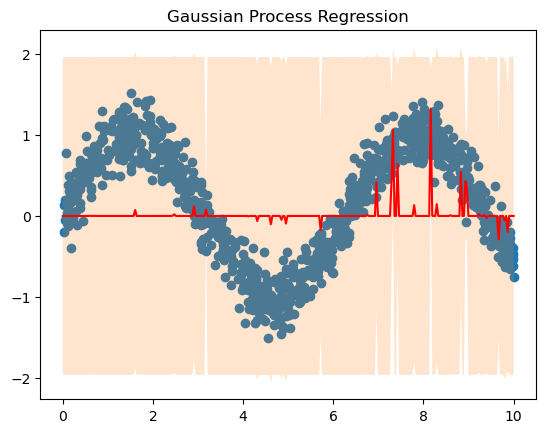

In [23]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Fit the model
kernel = RBF()
gpr_model = GaussianProcessRegressor(kernel=kernel)
gpr_model.fit(X, y)

# Predictions
y_predict, sigma = gpr_model.predict(X_new, return_std=True)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.fill_between(X_new.flatten(), y_predict.flatten() - 1.96 * sigma, y_predict.flatten() + 1.96 * sigma, alpha=0.2)
plt.title("Gaussian Process Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

# 6. Neural Network-Based Regression

## Multi-Layer Perceptron (MLP) Regressor

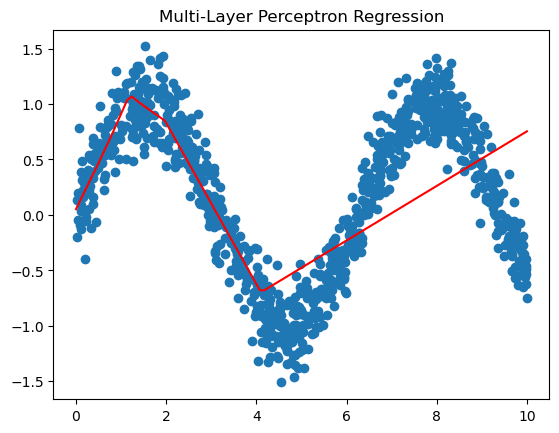

In [24]:
from sklearn.neural_network import MLPRegressor

# Fit the model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
mlp_model.fit(X, y.flatten())

# Predictions
y_predict = mlp_model.predict(X_new)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.title("Multi-Layer Perceptron Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Deep Learning Regression (using TensorFlow)

In [25]:
!pip install tensorflow

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


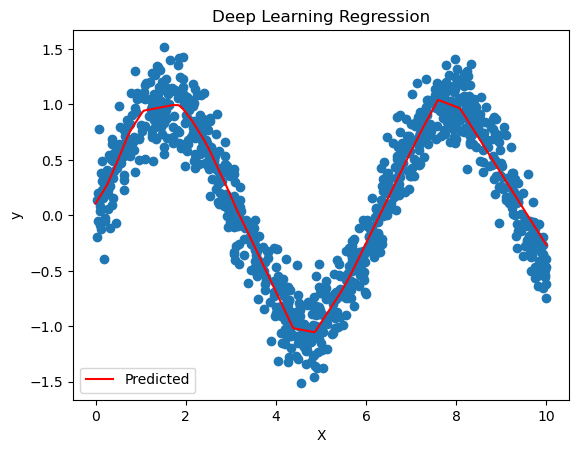

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Build the model using Input() layer (recommended)
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),                 # Replaces input_shape in Dense
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Fit the model
model.fit(X, y, epochs=100, verbose=0)

# Predictions
y_predict = model.predict(X_new)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-", label="Predicted")
plt.title("Deep Learning Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Convolutional Neural Networks (CNN) for regression tasks

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


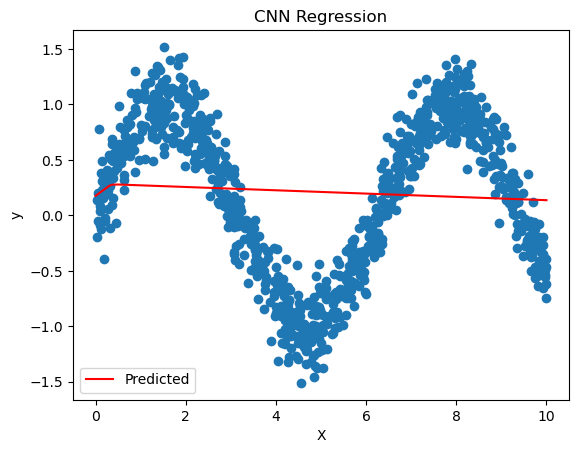

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Reshape data for CNN
X_cnn = X.reshape(-1, 1, 1)
X_new_cnn = X_new.reshape(-1, 1, 1)

# Build the model
cnn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(1, 1)),                         # Use Input instead of input_shape in Conv1D
    tf.keras.layers.Conv1D(32, kernel_size=1, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='mse')

# Fit the model
cnn_model.fit(X_cnn, y, epochs=100, verbose=0)

# Predictions
y_predict = cnn_model.predict(X_new_cnn)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-", label="Predicted")
plt.title("CNN Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Recurrent Neural Networks (RNN) for time series regression

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


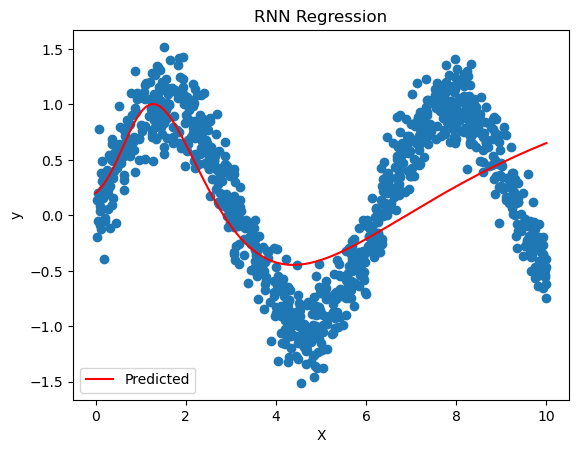

In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Reshape data for RNN
X_rnn = X.reshape(-1, 1, 1)
X_new_rnn = X_new.reshape(-1, 1, 1)

# Build the model
rnn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(1, 1)),              # Preferred way to specify input shape
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='mse')

# Fit the model
rnn_model.fit(X_rnn, y, epochs=100, verbose=0)

# Predictions
y_predict = rnn_model.predict(X_new_rnn)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-", label="Predicted")
plt.title("RNN Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

# 7. Bayesian Regression Models

## Bayesian Linear Regression

In [29]:
!pip install pymc

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


📌 Generating data...
📌 Defining PyMC model...
🚀 Sampling in progress...


Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [alpha, beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 271 seconds.


✅ Sampling complete.
📊 Plotting regression line...


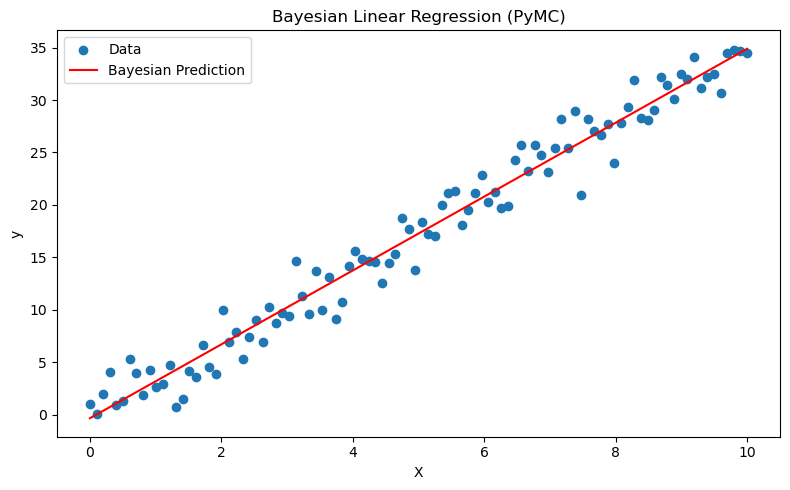

✅ Plot saved to 'regression_models_output.png'.


In [30]:
import os
import warnings
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# 📌 1. Suppress warnings and PyTensor compiler messages
os.environ["PYTENSOR_FLAGS"] = "cxx="  # Suppresses g++ warning
warnings.filterwarnings("ignore", category=RuntimeWarning)  # Overflow, exp, etc.
warnings.filterwarnings("ignore", module="pytensor")
warnings.filterwarnings("ignore", module="numpy")

# 📌 2. Generate synthetic data
print("📌 Generating data...")
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 3.5 * X + np.random.normal(0, 2, size=100)
X_new = np.linspace(0, 10, 100)

# 📌 3. Scale data to prevent overflow
X_mean, X_std = X.mean(), X.std()
X_scaled = (X - X_mean) / X_std
X_new_scaled = (X_new - X_mean) / X_std

# 📌 4. Define and sample the Bayesian model
print("📌 Defining PyMC model...")
with pm.Model() as model:
    alpha = pm.Normal("alpha", mu=0, sigma=5)
    beta = pm.Normal("beta", mu=0, sigma=5)
    sigma = pm.HalfNormal("sigma", sigma=2)

    mu = alpha + beta * X_scaled
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    print("🚀 Sampling in progress...")
    trace = pm.sample(
        draws=1000,
        tune=1000,
        chains=4,
        cores=1,
        target_accept=0.95,
        progressbar=True
    )
print("✅ Sampling complete.")

# 📌 5. Make predictions
alpha_mean = trace.posterior["alpha"].mean().item()
beta_mean = trace.posterior["beta"].mean().item()
y_pred = alpha_mean + beta_mean * X_new_scaled

# 📌 6. Plot the result
print("📊 Plotting regression line...")
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Data")
plt.plot(X_new, y_pred, "r-", label="Bayesian Prediction")
plt.title("Bayesian Linear Regression (PyMC)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.savefig("regression_models_output.png", bbox_inches="tight")
plt.show()
print("✅ Plot saved to 'regression_models_output.png'.")

## Bayesian Ridge Regression

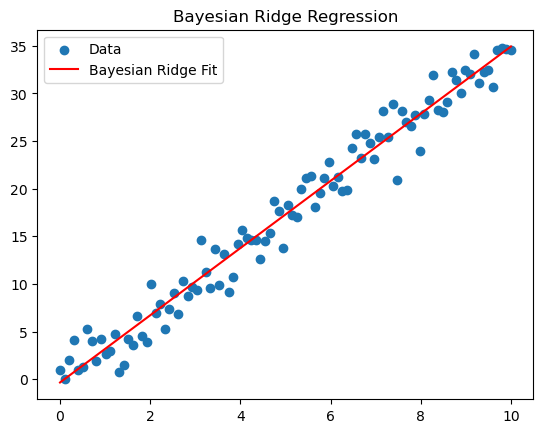

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge

# Sample data (if not already defined)
# X = np.linspace(0, 10, 100)
# y = 3 * X + np.random.randn(100)

# Ensure inputs are 2D
X = X.reshape(-1, 1)
X_new = X_new.reshape(-1, 1)

# Fit the model
bayesian_ridge_model = BayesianRidge()
bayesian_ridge_model.fit(X, y.flatten())

# Predictions
y_predict = bayesian_ridge_model.predict(X_new)

# Plotting
plt.scatter(X, y, label='Data')
plt.plot(X_new, y_predict, "r-", label='Bayesian Ridge Fit')
plt.title("Bayesian Ridge Regression")
plt.legend()
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Gaussian Bayesian Regression

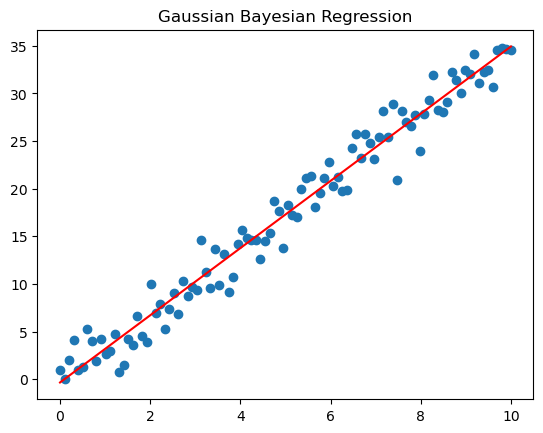

In [32]:
# Fit the model
gaussian_bayesian_model = BayesianRidge()
gaussian_bayesian_model.fit(X, y.flatten())

# Predictions
y_predict = gaussian_bayesian_model.predict(X_new)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.title("Gaussian Bayesian Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

# 8. Ensemble Regression Methods

## Bagging Regression

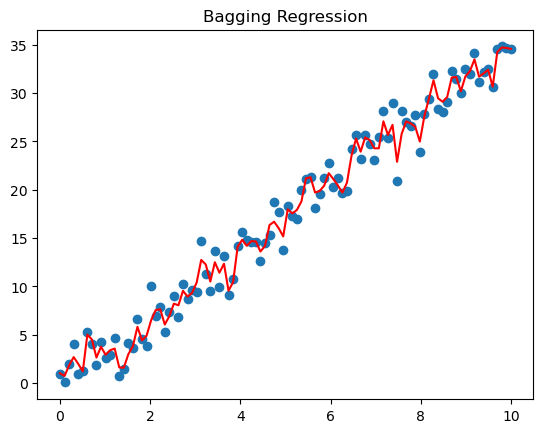

In [33]:
from sklearn.ensemble import BaggingRegressor

# Fit the model
bagging_model = BaggingRegressor()
bagging_model.fit(X, y.flatten())

# Predictions
y_predict = bagging_model.predict(X_new)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.title("Bagging Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Stacking Regression

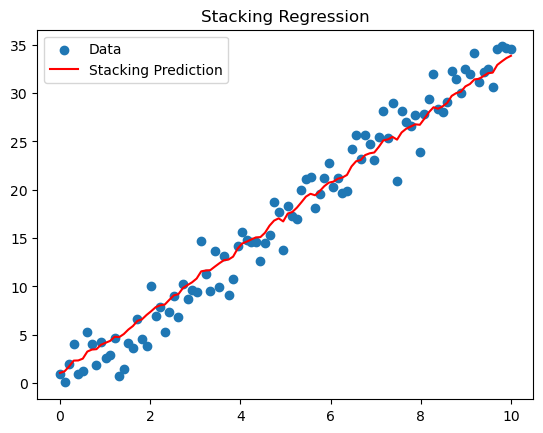

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.datasets import make_regression

# Sample data
# X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X = X.reshape(-1, 1)
X_new = X_new.reshape(-1, 1)

# Define base learners
base_learners = [
    ('lr', LinearRegression()),
    ('ridge', Ridge(alpha=1.0)),
    ('rf', RandomForestRegressor(n_estimators=10, random_state=42))
]

# Meta-learner
meta_learner = LinearRegression()

# Define and train stacking model
stacking_model = StackingRegressor(estimators=base_learners, final_estimator=meta_learner)
stacking_model.fit(X, y.flatten())

# Predictions
y_predict = stacking_model.predict(X_new)

# Plotting
plt.scatter(X, y, label="Data")
plt.plot(X_new, y_predict, "r-", label="Stacking Prediction")
plt.title("Stacking Regression")
plt.legend()
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Boosting Regression (like AdaBoost)

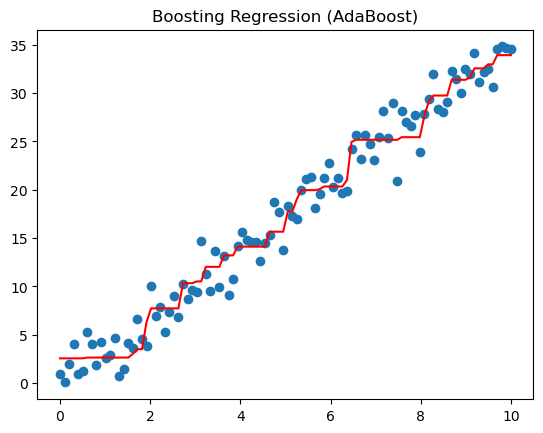

In [35]:
from sklearn.ensemble import AdaBoostRegressor

# Fit the model
ada_model = AdaBoostRegressor()
ada_model.fit(X, y.flatten())

# Predictions
y_predict = ada_model.predict(X_new)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.title("Boosting Regression (AdaBoost)")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Voting Regression

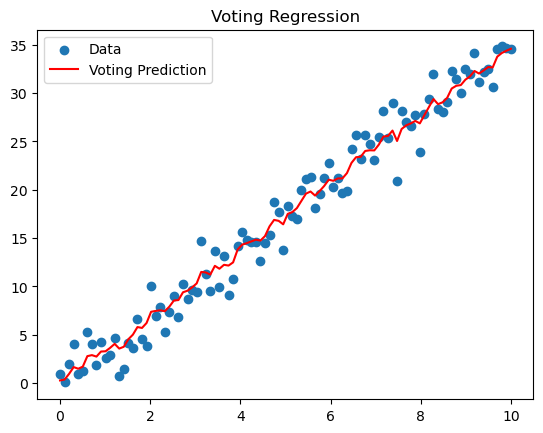

In [36]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
import matplotlib.pyplot as plt

# Make sure X, y, and X_new are defined and correctly shaped
X = X.reshape(-1, 1)
X_new = X_new.reshape(-1, 1)

# Fit the Voting Regressor model
voting_model = VotingRegressor(estimators=[
    ('ridge', Ridge()),
    ('lasso', Lasso()),
    ('rf', RandomForestRegressor())
])

voting_model.fit(X, y.flatten())

# Predictions
y_predict = voting_model.predict(X_new)

# Plotting
plt.scatter(X, y, label="Data")
plt.plot(X_new, y_predict, "r-", label="Voting Prediction")
plt.title("Voting Regression")
plt.legend()
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

# 9. Robust Regression

## RANSAC Regression

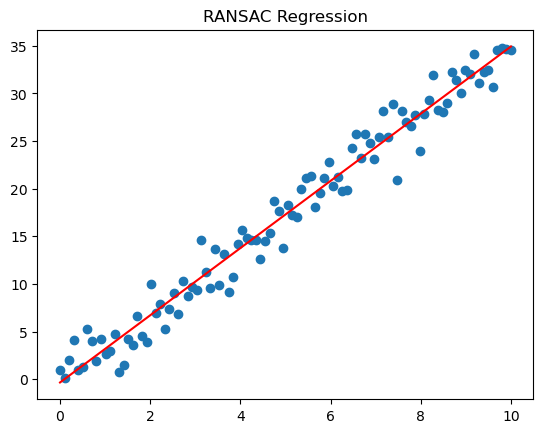

In [37]:
from sklearn.linear_model import RANSACRegressor

# Fit the model
ransac_model = RANSACRegressor(LinearRegression())
ransac_model.fit(X, y.flatten())

# Predictions
y_predict = ransac_model.predict(X_new)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.title("RANSAC Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Theil–Sen Estimator

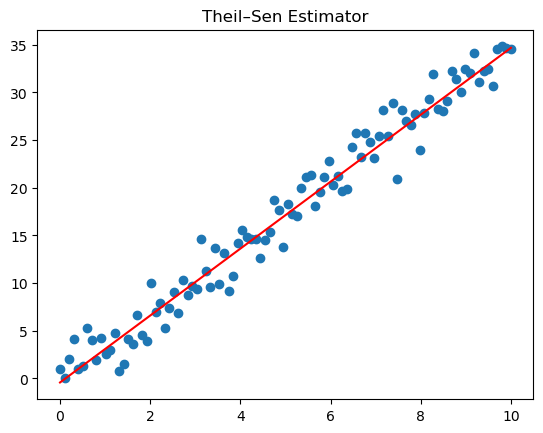

In [38]:
from sklearn.linear_model import TheilSenRegressor

# Fit the model
theil_sen_model = TheilSenRegressor()
theil_sen_model.fit(X, y.flatten())

# Predictions
y_predict = theil_sen_model.predict(X_new)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.title("Theil–Sen Estimator")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Huber Regression

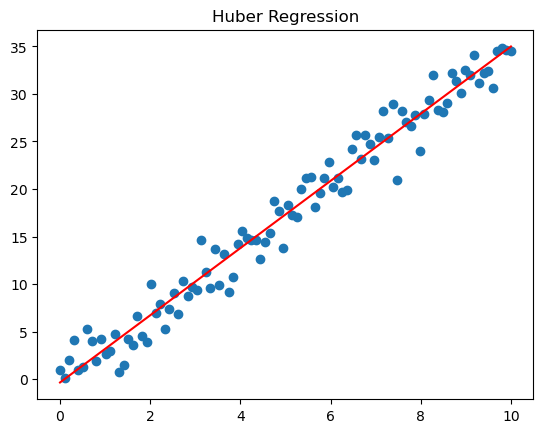

In [39]:
from sklearn.linear_model import HuberRegressor

# Fit the model
huber_model = HuberRegressor()
huber_model.fit(X, y.flatten())

# Predictions
y_predict = huber_model.predict(X_new)

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.title("Huber Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

# 10. Quantile & Ordinal Regression

## Quantile Regression

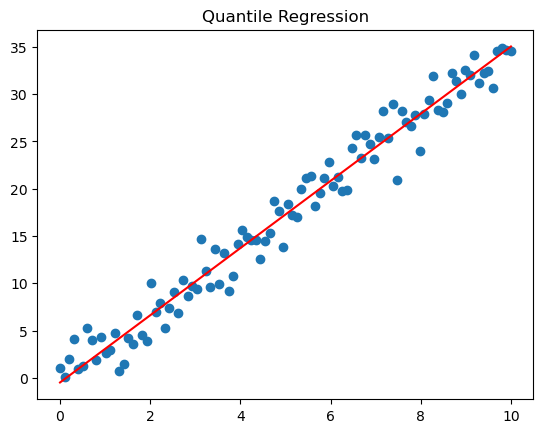

In [40]:
import statsmodels.api as sm

# Fit the model
quantile_model = sm.QuantReg(y.flatten(), sm.add_constant(X)).fit(q=0.5)

# Predictions
y_predict = quantile_model.predict(sm.add_constant(X_new))

# Plotting
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.title("Quantile Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()

## Ordinal Regression (for ordered categories)

In [41]:
!pip install mord

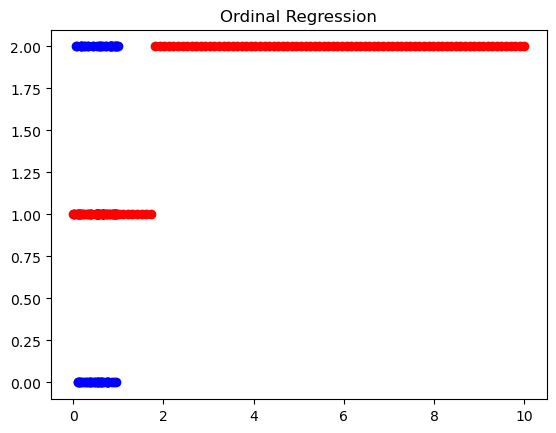

In [42]:
from mord import LogisticAT

# Generate synthetic ordinal data
X_ord = np.random.rand(100, 1)
y_ord = np.random.randint(0, 3, size=100)  # 3 ordered categories

# Fit the model
ordinal_model = LogisticAT()
ordinal_model.fit(X_ord, y_ord)

# Predictions
y_predict = ordinal_model.predict(X_new)

# Plotting
plt.scatter(X_ord, y_ord, color='blue')
plt.scatter(X_new, y_predict, color='red')
plt.title("Ordinal Regression")
plt.savefig("regression_models_output.png", bbox_inches='tight')
plt.show()